In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
df=pd.read_csv('diabetes_Original_Data.csv')

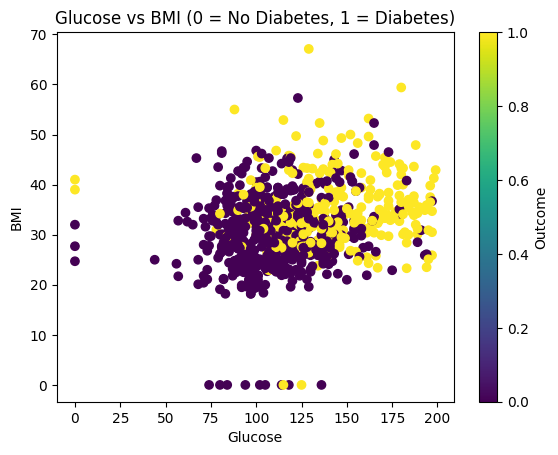

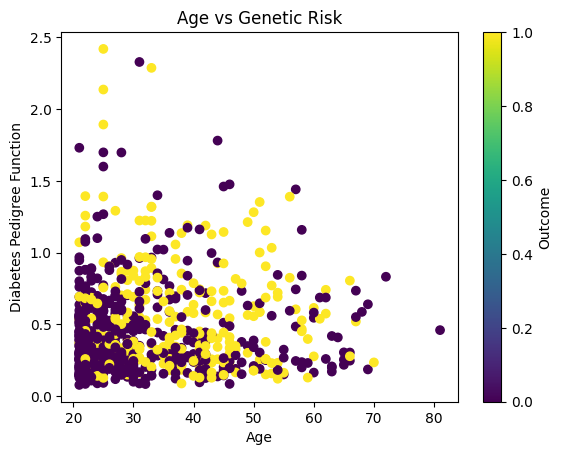

LogisticRegression()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
df = pd.read_csv("diabetes_Original_Data.csv")

plt.scatter(df["Glucose"], df["BMI"], c=df["Outcome"])

plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Glucose vs BMI (0 = No Diabetes, 1 = Diabetes)")
plt.colorbar(label="Outcome")
plt.show()
plt.scatter(df["Age"], df["DiabetesPedigreeFunction"], c=df["Outcome"])
plt.xlabel("Age")
plt.ylabel("Diabetes Pedigree Function")
plt.title("Age vs Genetic Risk")
plt.colorbar(label="Outcome")
plt.show()
X1 = df[["Glucose", "BMI"]]
y1 = df["Outcome"]
model = LogisticRegression()
model.fit(X, y)


In [24]:
predictions = model.predict(X)
predictions

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [25]:
new_glucose = pd.DataFrame({
    "Glucose":[110],
    "BMI":[25.1]
})

model.predict(new_glucose)
print(model.classes_)
model.predict_proba(new_glucose)

[0 1]


array([[0.84954645, 0.15045355]])

In [26]:
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7643229166666666


In [27]:
cm = confusion_matrix(y, predictions)
print(cm)

[[445  55]
 [126 142]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


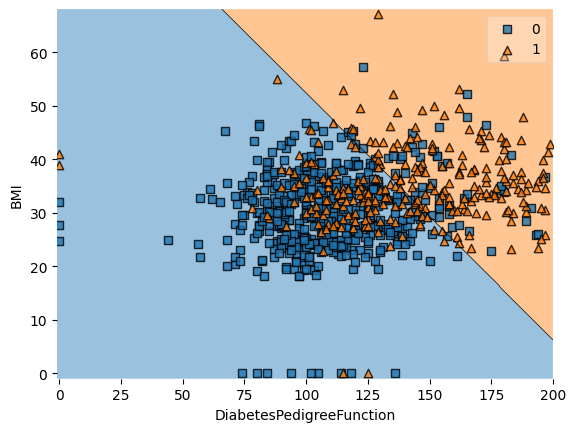

In [28]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf=model)
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("BMI")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [32]:
from sklearn.ensemble import RandomForestClassifier
rand_forest=RandomForestClassifier(n_estimators=100,random_state=42)
rand_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [33]:
from sklearn.metrics import accuracy_score
y_pred=logreg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7662337662337663


In [34]:
from sklearn.metrics import classification_report
y_pred=rand_forest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154

